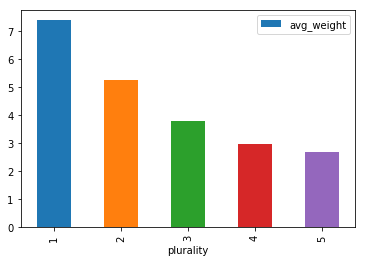

In [9]:
from google.cloud import bigquery
import pandas

query="""
SELECT
  plurality,
  AVG(weight_pounds) as avg_weight
FROM `bigquery-public-data.samples.natality`
WHERE 
  source_year <= 2000 
  AND 
  plurality IS NOT NULL
GROUP BY plurality
ORDER BY plurality
"""

def exec_query( query ):

    # Create bigquery instance
    client = bigquery.Client()

    # Prepare job
    job = client.query( query )
    
    # Execute job
    return job.result()
       
#result = exec_query(query)

df = pandas.read_gbq(query, project_id="elite-caster-125113",dialect="standard")

df.plot(x="plurality", y="avg_weight", kind="bar")